In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
plt.rcParams['figure.figsize']=(15,9)

In [2]:
amazon_food_review = pd.read_csv("/Users/sikedong/Python Practice/reviews.csv")

In [3]:
amazon_food_review.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [4]:
amazon_food_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568428 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
amazon_food_review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
from __future__ import print_function
%matplotlib inline
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

/Users/sikedong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
reviewed_products = amazon_food_review.groupby(['ProductId']).count()
reviewed_products.head()

,Id,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
ProductId,,,,,,,,,
0006641040,37,37,37,37,37,37,37,37,37
141278509X,1,1,1,1,1,1,1,1,1
2734888454,2,2,2,2,2,2,2,2,2
2841233731,1,1,1,1,1,1,1,1,1
7310172001,173,173,173,173,173,173,173,173,173


In [8]:
reviewed_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74258 entries, 0006641040 to B009WVB40S
Data columns (total 9 columns):
Id                        74258 non-null int64
UserId                    74258 non-null int64
ProfileName               74258 non-null int64
HelpfulnessNumerator      74258 non-null int64
HelpfulnessDenominator    74258 non-null int64
Score                     74258 non-null int64
Time                      74258 non-null int64
Summary                   74258 non-null int64
Text                      74258 non-null int64
dtypes: int64(9)
memory usage: 5.7+ MB


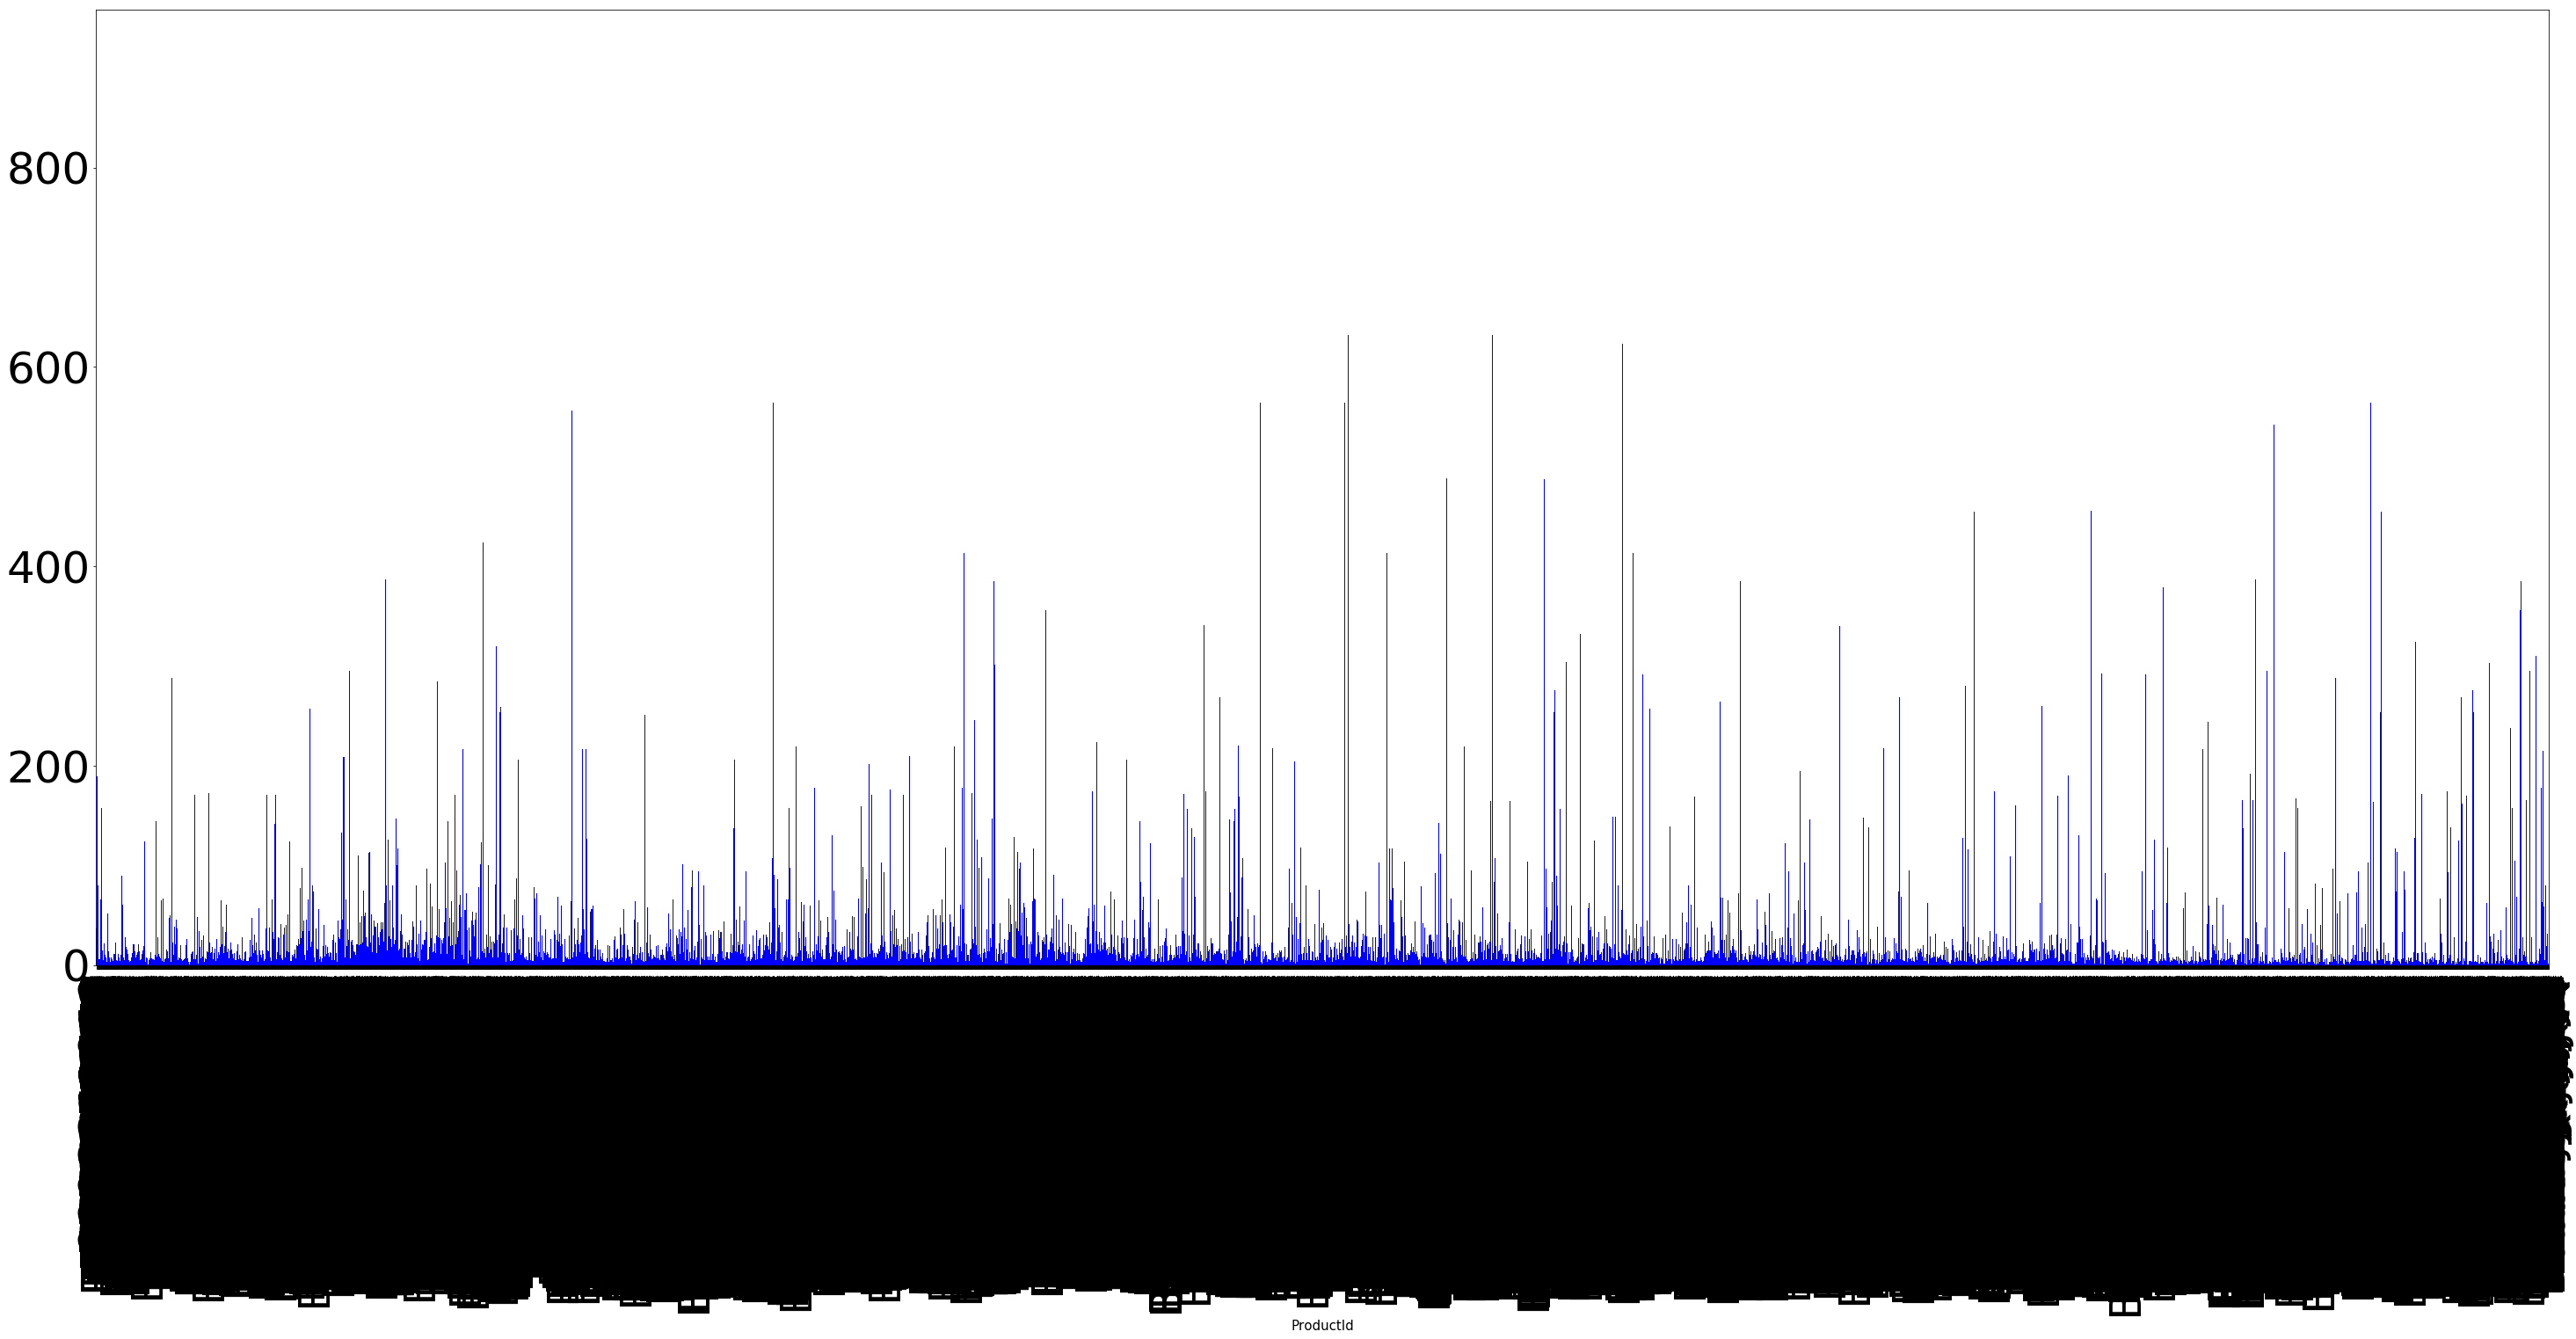

In [17]:
plt.figure(figsize=(50,20))
reviewed_products['Score'].plot.bar(width=10, color="blue")
plt.xticks(size = 50)
plt.yticks(size = 50)
plt.show()

In [19]:
reviewed_products.loc[reviewed_products['Score'].idxmax()]

Id                        913
UserId                    913
ProfileName               913
HelpfulnessNumerator      913
HelpfulnessDenominator    913
Score                     913
Time                      913
Summary                   913
Text                      913
Name: B007JFMH8M, dtype: int64

Description of the graph: Although the dataset has too much data and cannot show each product Id clearly, it is obviously to find out there isn't a specific trend in this graph, which means the key factor for a user to choose product is still his/her own appetizer. 

Also the application of idxmax() would help us to find out the product users bought the most often is B007JFMH8M, which is a kind of cookie. 

In [27]:
amazon_food_review["Helpful or not %"] = np.where(amazon_food_review['HelpfulnessDenominator'] > 0, amazon_food_review['HelpfulnessNumerator']/amazon_food_review['HelpfulnessDenominator'], -1)
amazon_food_review["Helpful%"] = pd.cut(amazon_food_review["Helpful or not %"], bins=[-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0],
labels = ['Not helpful', 'a little bit', 'average', 'helpful', 'quite helpful', 'very helpful'], include_lowest = True)

Text(0.5,1,'How the users find the reviews are helpful?')

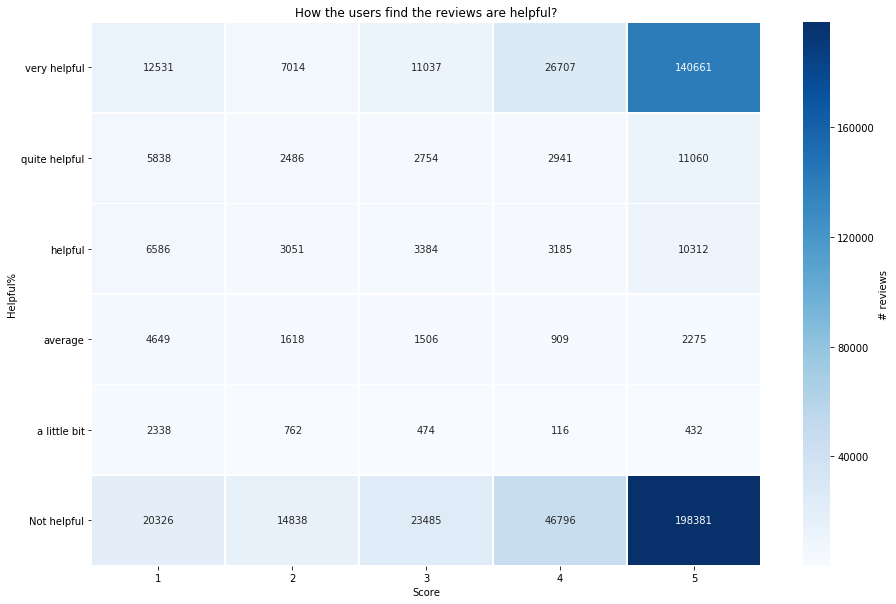

In [28]:
corr_review_user = amazon_food_review.groupby(['Score', 'Helpful%']).agg({'Id':'count'})
corr_review_user = corr_review_user.unstack()
corr_review_user.columns = corr_review_user.columns.get_level_values(1)
map = plt.figure(figsize=(15,10))

sns.heatmap(corr_review_user[corr_review_user.columns[::-1]].T, cmap = "Blues", linewidths = .8, annot = True, fmt='d', cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.title('How the users find the reviews are helpful?')

Description of the graph:
Through this heatmap, we can see the conclusion below:
1. reviews are skewed towards positive
2. Among all the reviews, many users(140661+11060+10312=162033) agree with 5-score reivews
3. More than half of the reviews are not helpful.